In [1]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
%matplotlib inline 
import pandas as pd
import numpy as np
path='data/dftRoadSafetyData_Accidents_2018.csv'
df = pd.read_csv(path)
df.shape

In [2]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [3]:
df.shape

(122635, 32)

In [4]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            55
Location_Northing_OSGR                           55
Longitude                                        55
Latitude                                         55
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             13
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [5]:
df.drop(['Number_of_Casualties','Speed_limit', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Number_of_Vehicles', 'Time', 'Junction_Detail', 'Junction_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Pedestrian_Crossing-Human_Control', 'LSOA_of_Accident_Location', 'Date', 'Accident_Index', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '2nd_Road_Class', '2nd_Road_Number', 'Police_Force', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Accident_Index', '1st_Road_Number', '1st_Road_Class'], axis=1, inplace=True)

In [6]:
df.dtypes
df.shape

(122635, 7)

In [7]:
RTD1=df[df['Road_Type']==-1].index
df.drop(RTD1 , inplace=True)
RTD2=df[df['Road_Type']==9].index
df.drop(RTD2 , inplace=True)
LCD=df[df['Light_Conditions']==-1].index
df.drop(LCD , inplace=True)
WCD1=df[df['Weather_Conditions']==9].index
df.drop(WCD1 , inplace=True)
WCD2=df[df['Weather_Conditions']==-1].index
df.drop(WCD2 , inplace=True)
RSCC=df[df['Road_Surface_Conditions']==-1].index
df.drop(RSCC , inplace=True)
URD1=df[df['Urban_or_Rural_Area']==3].index
df.drop(URD1 , inplace=True)
URD2=df[df['Urban_or_Rural_Area']==-1].index
df.drop(URD2 , inplace=True)

#df['Urban_or_Rural_Area'].value_counts()
df.shape

(116806, 7)

In [20]:

from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Day_of_Week'], df['Accident_Severity'])
print("The DW Pearson Correlation Coeff is", pearson_coef, " with a P-value of =", p_value) 
pearson_coef, p_value = stats.pearsonr(df['Road_Type'], df['Accident_Severity'])
print("The RT Pearson Correlation Coeff is", pearson_coef, " with a P-value of =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Light_Conditions'], df['Accident_Severity'])
print("The LC Pearson Correlation Coeff is", pearson_coef, " with a P-value of =", p_value)  
pearson_coef, p_value = stats.pearsonr(df['Urban_or_Rural_Area'], df['Accident_Severity'])
print("The UR Pearson Correlation Coeff is", pearson_coef, " with a P-value of =", p_value)  
pearson_coef, p_value = stats.pearsonr(df['Road_Surface_Conditions'], df['Accident_Severity'])
print("The RS Pearson Correlation Coeff is", pearson_coef, " with a P-value of =", p_value)  
pearson_coef, p_value = stats.pearsonr(df['Weather_Conditions'], df['Accident_Severity'])
print("The WC Pearson Correlation Coeff is", pearson_coef, " with a P-value of =", p_value)  

The DW Pearson Correlation Coeff is 0.004094040006618656  with a P-value of = 0.16175105216748345
The RT Pearson Correlation Coeff is -0.046740972246208476  with a P-value of = 1.6739455486280756e-57
The LC Pearson Correlation Coeff is -0.053607268023001156  with a P-value of = 4.40769664260657e-75
The UR Pearson Correlation Coeff is -0.08991593934442596  with a P-value of = 3.29891835955637e-208
The RS Pearson Correlation Coeff is 0.004881869959954748  with a P-value of = 0.09522374237112245
The WC Pearson Correlation Coeff is 0.011521538409716666  with a P-value of = 8.22347012056342e-05


In [21]:
X = df[['Road_Type','Light_Conditions', 'Weather_Conditions', 'Urban_or_Rural_Area']].values.astype(float)
X[0:5]

array([[3., 4., 1., 1.],
       [6., 4., 1., 1.],
       [6., 4., 1., 1.],
       [3., 4., 2., 1.],
       [6., 4., 1., 1.]])

In [22]:
y = df['Accident_Severity'].values.astype(float)
y[0:5]

array([3., 3., 3., 2., 2.])

In [23]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.28205292,  1.19642575, -0.31273124, -0.70454307],
       [ 0.55068856,  1.19642575, -0.31273124, -0.70454307],
       [ 0.55068856,  1.19642575, -0.31273124, -0.70454307],
       [-1.28205292,  1.19642575,  0.50556816, -0.70454307],
       [ 0.55068856,  1.19642575, -0.31273124, -0.70454307]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

Train set: (93444, 4) (93444,)
Test set: (23362, 4) (23362,)


array([0.63997089, 0.55795737, 0.75211883, 0.73910624, 0.77574694,
       0.68303227, 0.77596096, 0.77583255, 0.79389607])

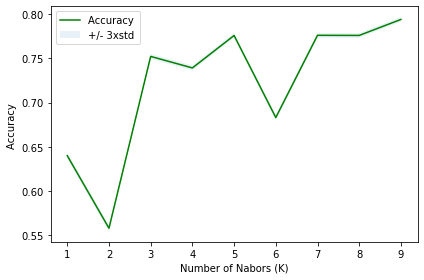

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [26]:
k = 9
neigh9 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat9 = neigh9.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh9.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat9))
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_test, yhat9)
from sklearn.metrics import f1_score
f1_score(y_test, yhat9, average='weighted') 

Train set Accuracy:  0.7936197080604426
Test set Accuracy:  0.7938960705419057


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7029273543242232

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatL = LR.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatL))
f1_score(y_test, yhatL, average='weighted') 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train set Accuracy:  0.7936518128504773
Test set Accuracy:  0.7938960705419057


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7026839304369334

In [28]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhatS = clf.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatS))
f1_score(y_test, yhatS, average='weighted') 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train set Accuracy:  0.7936518128504773
Test set Accuracy:  0.7938960705419057


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7026839304369334

In [31]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7938960705419057
